# Lecture 20 - Introduction to PyTorch

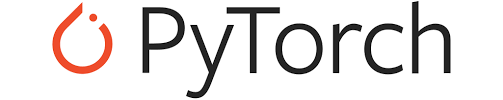

# What is PyTorch?

PyTorch was first released in October 2016.

PyTorch is a library for Python that facilitates building deep learning projects. It emphasizes flexibility and allows deep learning models to be expressed in idiomatic Python.

PyTorch provides a core data structure, the ```Tensor```, a multi-dimensional array that shares many similarities with ```Numpy``` arrays.

## Installing PyTorch

PyTorch is available as a Python package and you can either use ```pip```, or ```conda```, to build it or you can build it from source. The recommended approach for this book is to use the Anaconda Python 3 distribution. 

In the [PyTorch homepage](https://pytorch.org/) scroll to "quick start locally" to copy the command you should run using ```conda``` to install PyTorch in your machine. 

## Tensor: the basic unit in PyTorch

A **tensor** is a multi-dimensional array.

<div><img src="figures/tensor.png", width="500"><!div>

```PyTorch``` is not the only library dealing with multi-dimensional arrays. ```NumPy``` is by far the most popular multidimensional array library. In fact, ```PyTorch``` features seamless interoperability with ```NumPy```, which brings with it first class integration with the rest of the scientific libraries in Python, such as ```SciPy```, ```Scikit-learn```, and
```Pandas```.

Compared to ```NumPy``` arrays, ```PyTorch``` tensors have a few superpowers, such as the ability to perform very fast operations on Graphical Processing Units (GPUs), to distribute operations on multiple devices or machines, or to keep track of the graph of computations that created them. These are all important features when implementing a modern deep learning library.

In [ ]:
import torch

Python lists or tuples of numbers are collections of Python objects that are individually allocated in memory. 

PyTorch tensors or NumPy arrays on the other hand are viewed over (typically) contiguous memory blocks containing unboxed numeric types rather than Python objects.

<div><img src="figures/tensorObject.png", width="500"><!div>

For example, let's create samples that form the 2-Dtriangle connecting the vertices (4, 1), (5, 3) and (2, 1).

### Indexing Tensors

Let's consider how we would handle a tensor that is representing an image:

### Named Tensors

PyTorch 1.3 added **named tensors** as an experimental feature. Tensor factory functions such as ```tensor``` take a ```names``` argument. The names should be a sequence of strings.

In [ ]:
weights_named = torch.tensor([0.2126, 0.7152, 0.0722], names=['channels'])
weights_named

When we already have a tensor and want to add names (but not change existing ones), we can call the method ```refine_names``` on it. Similar to indexing, the ellipsis ```…``` allows you to leave out any number of dimensions. With the ```rename``` sibling method you can also overwrite or drop (by passing in None) existing names.

In [ ]:
img_named = # finish me
batch_named = # finish me

print("img named:", img_named.shape, img_named.names)
print("batch named:", batch_named.shape, batch_named.names)

In [ ]:
weights_aligned = # finish me

weights_aligned.shape, weights_aligned.names

In [ ]:
gray_image = # finish me

gray_image.shape, gray_image.names

### The Tensor API

The vast majority of operations on and between tensors are available under the ```torch``` module.

PyTorch documentation is exhaustive and well organized, with the tensor operations divided into groups. Let's check it out: www.pytorch.org/docs 

## Linear Regression using PyTorch

**Example:** We just got back from our trip to some obscure location, we brought back a fancy, wall-mounted analog thermometer. It looks great, it's a perfect fit for our living room. Its only flaw: it doesn't khow units. We'll build a dataset of readings and corresponding temperature values in our favorite units, choose a model, adjust its weights iteratively until a measure of the error is low enough and we’ll finally be able to interpret the new readings in units we understand.

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0] # Temperature in Celsius
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4] # Temperature in unknown 
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_u.shape, t_u

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(t_u,t_c);
plt.xlabel('Temperature in unknown units')
plt.ylabel('Temperature in Celsius');

Let's consider the output of a neuron unit as a linear function:

$$y = wx + w_0$$

where $y$ correspond to the temperature in Celsius and $x$ correspond to the temperature in unknown unit.

In [ ]:
def model(x, w, b):
    return w * x + b

In [ ]:
def loss_fn(prediction, y):
    squared_diffs = (prediction - y)**2
    return squared_diffs.mean()

In [ ]:
delta = 0.1

# definition of gradient
loss_rate_of_change_w = \
    (loss_fn(model(t_u, w + delta, b), t_c) - 
     loss_fn(model(t_u, w - delta, b), t_c)) / (2.0 * delta)

In [ ]:
learning_rate = 1e-2

w = w - learning_rate * loss_rate_of_change_w

In [ ]:
loss_rate_of_change_b = \
    (loss_fn(model(t_u, w, b + delta), t_c) - 
     loss_fn(model(t_u, w, b - delta), t_c)) / (2.0 * delta)

b = b - learning_rate * loss_rate_of_change_b

In [ ]:
def dloss_fn(prediction, y):
    dsq_diffs = 2 * (prediction - y) / prediction.size(0) 
    return dsq_diffs

In [ ]:
def dmodel_dw(x, w, b):
    return x

def dmodel_db(x, w, b):
    return 1.0

Putting all this together, the function returning the gradient of the loss with respect to $w$ and $b$ is:

In [ ]:
def grad_fn(x, y, prediction, w, b):
    dloss_dtp = dloss_fn(prediction, y)
    dloss_dw = dloss_dtp * dmodel_dw(x, w, b)
    dloss_db = dloss_dtp * dmodel_db(x, w, b)
    return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [ ]:
def training_loop(n_epochs, learning_rate, params, x, y, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        prediction = model(x, w, b)  # Forward pass
        loss = loss_fn(prediction, y)
        grad = grad_fn(x, y, prediction, w, b)  # Backward pass

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}: 
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break 
            
    return params

In [ ]:
prediction = # finish me

plt.plot(t_u.numpy(), prediction.detach().numpy())
plt.plot(t_u.numpy(), t_c.numpy(), 'o');

## PyTorch's Autograd

Depending on the cost function we use, we will need to compute the updates by hand... That's not good!

This is when PyTorch tensors come to the rescue, with a PyTorch component called autograd. Given a forward expression, no
matter how nested, PyTorch will provide the gradient of that expression with respect to its input parameters automatically.

In [ ]:
def training_loop(n_epochs, learning_rate, params, x, y):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:
            params.grad.zero_()
            
        prediction = model(x, *params)
        loss = loss_fn(prediction, y)
        loss.backward()
        
        with torch.no_grad():
            params -= learning_rate * params.grad
        
        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
    return params

In [ ]:
import torch.optim as optim

# finish me

## Using a Neural Network

PyTorch has a whole submodule dedicated to neural networks, called ```torch.nn```. It contains the building blocks needed to create all sorts of neural network architectures. Those building blocks are called modules in PyTorch parlance (these building blocks are often referred to as layers in other frameworks).

In [ ]:
n_samples = t_un.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

In [ ]:
t_un_train = t_un[train_indices]
t_c_train = t_c[train_indices]

t_un_val = t_un[val_indices]
t_c_val = t_c[val_indices]

In [ ]:
import torch.nn as nn

# finish me

In [ ]:
def training_loop(n_epochs, optimizer, model, loss_fn, x_train, x_val, y_train, y_val):
    for epoch in range(1, n_epochs + 1):
        pred_train = model(x_train)
        loss_train = loss_fn(pred_train, y_train)
        
        pred_val = model(x_val)
        loss_val = loss_fn(pred_val, y_val)
        
        optimizer.zero_grad()
        loss_train.backward()
        optimizer.step()
        
        if epoch == 1 or epoch % 1000 == 0:
            print('Epoch {}, Training loss {}, Validation loss {}'.format(
                epoch, float(loss_train), float(loss_val)))

In [ ]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

# finish me

print()
print(linear_model.weight)
print(linear_model.bias)

In [ ]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3)

training_loop(
n_epochs = 5000,
optimizer = optimizer,
model = seq_model,
loss_fn = nn.MSELoss(),
x_train = t_un_train,
x_val = t_un_val,
y_train = t_c_train,
y_val = t_c_val)

print('output', seq_model(t_un_val))
print('label', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

In [ ]:
t_range = torch.arange(20., 90.).unsqueeze(1)

plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx');

## Subclassing nn.Module

Adding model complexity...

In [2]:
# finish me

In [ ]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

In [ ]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

## Example: distinguishing birds from airplanes using CIFAR-10 data set

CIFAR-10 consists of 60000 tiny 32x32 color (RGB) images, labeled with an integer corresponding to 10 classes, namely airplane (0), automobile (1), bird (2), cat (3), deer (4), dog (5), frog (6), horse (7), ship (8), truck (9).

In [ ]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch6/'

cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

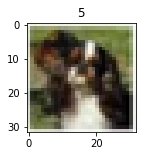

In [94]:
img, label = cifar10[500]

plt.figure(figsize=(2,2))
plt.imshow(img)
plt.title(label)
plt.show()

In [ ]:
from torchvision import transforms

# finish me

In [ ]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                  transform=transforms.ToTensor())

In [ ]:
imgs.view(3, -1).mean(dim=1)

In [ ]:
imgs.view(3, -1).std(dim=1)

In [ ]:
transformed_cifar10 = datasets.CIFAR10(data_path, train=True, download=False,
                                       transform=transforms.Compose([
                                           transforms.ToTensor(),
                                           transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                                (0.2470, 0.2435, 0.2616))
                                       ]))

Distinguishing birds from airplanes...

In [ ]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

In [ ]:
img, _ = cifar2[1]

plt.figure(figsize=(2,2))
plt.imshow(img)
plt.show()

In [ ]:
img_sample = img.view(-1).unsqueeze(0)
out = # finishe me
out

In [170]:
model = nn.Sequential(
            nn.Linear(3072, 512),
            nn.Tanh(),
            nn.Linear(512, 2),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.NLLLoss()

n_epochs = 10

for epoch in range(n_epochs):
    for img, label in cifar2:
        img = to_tensor(img)
        out = model(img.view(-1).unsqueeze(0))
        loss = loss_fn(out, torch.tensor([label]))
                
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.311792
Epoch: 1, Loss: 1.496687
Epoch: 2, Loss: 1.925069
Epoch: 3, Loss: 2.282611
Epoch: 4, Loss: 2.662120
Epoch: 5, Loss: 3.253624
Epoch: 6, Loss: 3.380375
Epoch: 7, Loss: 3.722273
Epoch: 8, Loss: 4.608356
Epoch: 9, Loss: 4.933189


If you have a GPU, use it! 

The last script only runs for 10 iterations and therefore the accuracy in both training and test sets will be drastically impacted... You can try with e.g. 100 epochs.

In [213]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in cifar2:
        imgs = to_tensor(imgs)
        outputs = model(imgs.view(-1).unsqueeze(0))
        _, predicted = torch.max(outputs, dim=1)
        total += 1
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.491700


In [214]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in cifar2_val:
        imgs = to_tensor(imgs)
        outputs = model(imgs.view(-1).unsqueeze(0))
        _, predicted = torch.max(outputs, dim=1)
        total += 1
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.492000
